<center><h1><strong>WeRateDogs Data Analysis and Visualization</strong></h1></center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#WeRateDogs-Data-Analysis-and-Visualization" data-toc-modified-id="WeRateDogs-Data-Analysis-and-Visualization-1"><strong>WeRateDogs Data Analysis and Visualization</strong></a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2">Introduction</a></span></li><li><span><a href="#1.-Analysing-the-image-predictions-DataFrame" data-toc-modified-id="1.-Analysing-the-image-predictions-DataFrame-3">1. Analysing the image predictions DataFrame</a></span><ul class="toc-item"><li><span><a href="#1.1-Asking-Questions" data-toc-modified-id="1.1-Asking-Questions-3.1">1.1 Asking Questions</a></span></li><li><span><a href="#1.2-Analysis-and-Visualization" data-toc-modified-id="1.2-Analysis-and-Visualization-3.2">1.2 Analysis and Visualization</a></span></li><li><span><a href="#1.3-Conclusion" data-toc-modified-id="1.3-Conclusion-3.3">1.3 Conclusion</a></span></li></ul></li><li><span><a href="#2.-Analyzing-the-twitter-archive-data-and-the-prediction-level-1" data-toc-modified-id="2.-Analyzing-the-twitter-archive-data-and-the-prediction-level-1-4">2. Analyzing the twitter archive data and the prediction level 1</a></span><ul class="toc-item"><li><span><a href="#2.1-Asking-Questions" data-toc-modified-id="2.1-Asking-Questions-4.1">2.1 Asking Questions</a></span></li><li><span><a href="#2.2-Analysis-and-Visualization" data-toc-modified-id="2.2-Analysis-and-Visualization-4.2">2.2 Analysis and Visualization</a></span></li><li><span><a href="#2.3-Conclusion" data-toc-modified-id="2.3-Conclusion-4.3">2.3 Conclusion</a></span></li></ul></li></ul></div>

# Introduction

This Document is only for the data analysis and the visualization process. For more information about the data wrangling process please check [wrangle_report.html](wrangle_report.html) or [wrangle_act.ipynb](wrangle_act.ipynb) for the full process.

The analysis and visualization processes were possible thanks to the following packages and libraries:
- [pandas](https://pandas.pydata.org/)
- [matplotlib](https://matplotlib.org/)
- [seaborn](https://seaborn.pydata.org/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline

First step was to import cleaned data from 'twitter_archive_master.csv' and 'image_predictions_clean.csv' files to pandas DataFrame

In [2]:
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
928,673686845050527744,2015-12-07 02:13:55+00:00,Twitter for iPhone,This is George. He's upset that the 4th of Jul...,https://twitter.com/dog_rates/status/673686845...,11,10,George,NaN,404,1352


In [3]:
df_img = pd.read_csv('image_predictions_clean.csv')
df_img.sample(3)

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
3322,723673163800948736,https://pbs.twimg.com/media/CgsA5eFWgAAu0qn.jpg,1,2,Labrador_retriever,0.065706,True
4427,780476555013349377,https://pbs.twimg.com/tweet_video_thumb/CtTFZZ...,1,3,bull_mastiff,0.028468,True
2442,692568918515392513,https://pbs.twimg.com/media/CZx_wV2UMAArgsJ.jpg,2,1,golden_retriever,0.636845,True


# 1. Analysing the image predictions DataFrame

## 1.1 Asking Questions

We start by analysing the image DataFrame trying to answer the following Questions:
    
    1. Which prediction level is more reliable?
    2. How much of the predicted data were actual breed of dogs compared to other objects?

## 1.2 Analysis and Visualization

We start by comparing the confidence levels in along the 3 prediction levels using a bar graph of the mean confidence level and a box plot per prediction level. Also, checking whether the average confidence is different if the prediction is a breed of dogs or not.

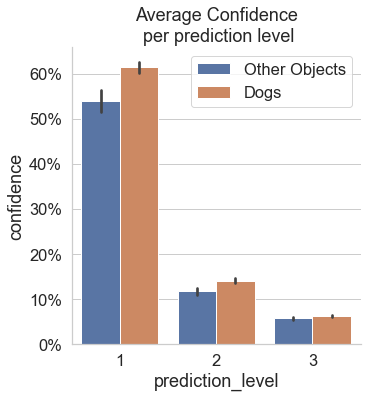

In [4]:
sns.color_palette("muted")
sns.set_theme(style="whitegrid",font_scale=1.5)

ax = sns.catplot(x='prediction_level',y='confidence',data=df_img,hue="breed" ,kind="bar",legend=False)
plt.title('Average Confidence\n per prediction level')

for axis in ax.axes.flat:
    axis.yaxis.set_major_formatter(mtick.PercentFormatter(1))

L=plt.legend()
L.get_texts()[0].set_text('Other Objects')
L.get_texts()[1].set_text('Dogs')
plt.show()

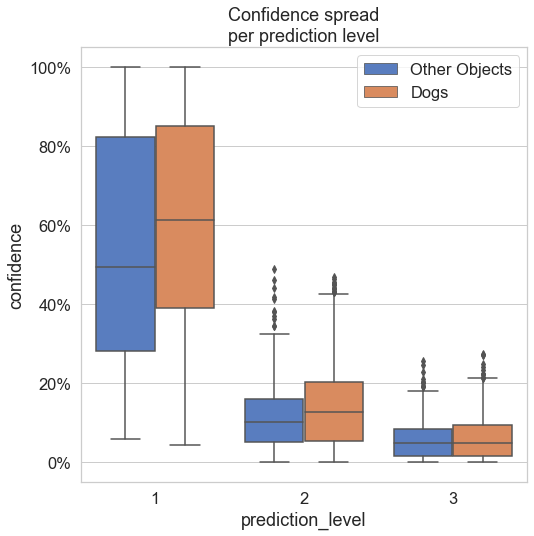

In [5]:
plt.figure(figsize=(8,8))

ax = sns.boxplot(x='prediction_level',y='confidence',hue='breed',palette="muted",data=df_img)
plt.title("Confidence spread\nper prediction level")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
L=plt.legend()
L.get_texts()[0].set_text('Other Objects')
L.get_texts()[1].set_text('Dogs')

plt.show()

Comparing the prediction levels capabilities of differentiating between breed of dogs and other objects.
Does prediction levels accuracy of differentiating between dogs and other objects.

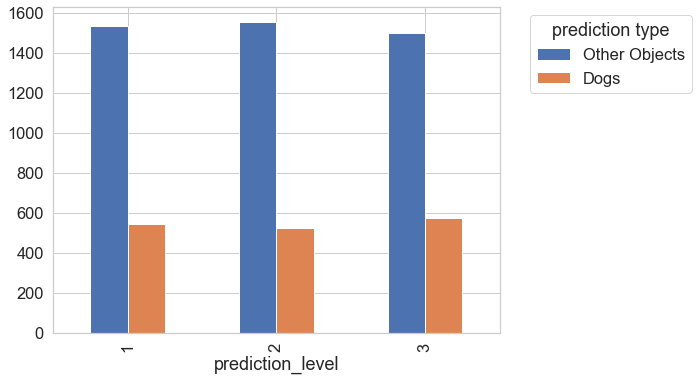

In [6]:
dogs = df_img[df_img['breed']==True].groupby('prediction_level')['breed'].value_counts()
not_dogs = df_img[df_img['breed']==False].groupby('prediction_level')['breed'].value_counts()

data = pd.merge(dogs,not_dogs,on='prediction_level')

data.plot(kind='bar',figsize=(8,6))
plt.legend(labels=['Other Objects','Dogs'],title='prediction type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

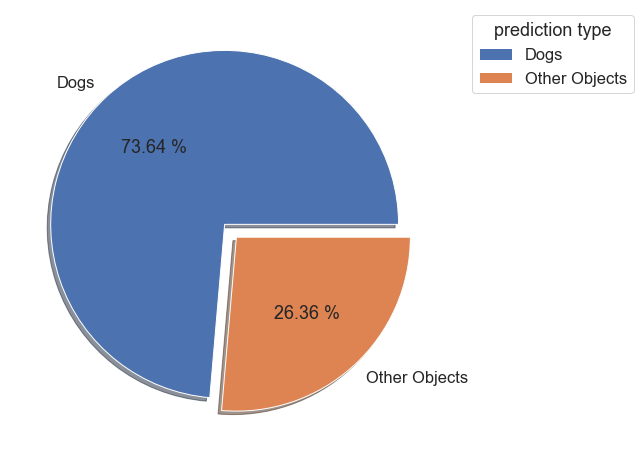

In [7]:
x = df_img.breed.value_counts()

explode = (0,0.1)
plt.figure(figsize=(8,8))

plt.pie(x, labels=['Dogs','Other Objects'], autopct='%.2f %%', explode=explode, shadow=True)

plt.legend(labels=['Dogs','Other Objects'],title='prediction type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


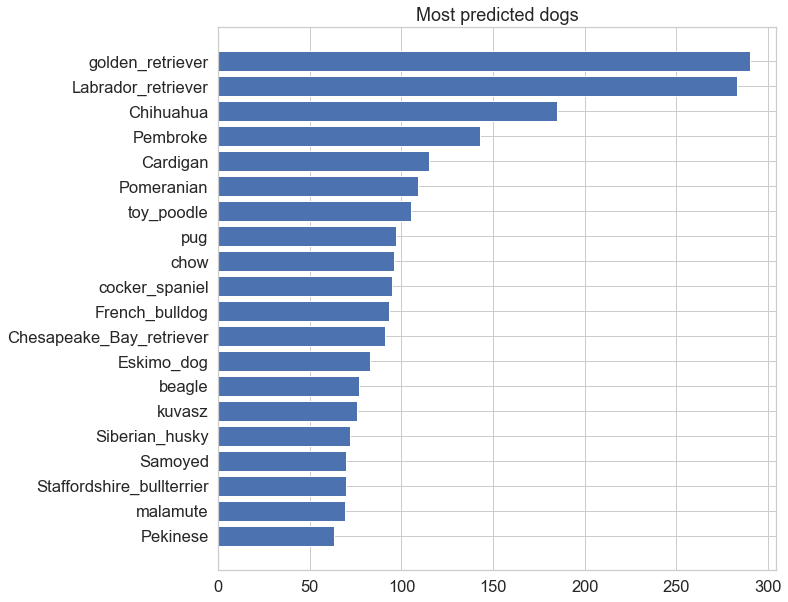

In [8]:
# top ten predicted breeds of dogs
data = df_img['prediction'].value_counts()[:20]

fig, ax = plt.subplots(figsize=(10,10))
ax.barh(data.keys(),data.values)
ax.invert_yaxis()
plt.title("Most predicted dogs")
plt.show()


## 1.3 Conclusion

From the above analysis and visualization, it is clear that prediction level 1 can be considered the most reliable prediction level.

Hence, it's time to merge the data from the clean twitter archive with the prediction level 1 data.

In [9]:
# merge the prediction level 1 with the twitter archive data
right = df_img[df_img['prediction_level']==1][['tweet_id','prediction','breed']]

left = df_master[['tweet_id','timestamp','rating_numerator','dog_stage','retweet_count','favorite_count']]

df_merged = pd.merge(left,right,on='tweet_id')
df_merged.sample(3)

,tweet_id,timestamp,rating_numerator,dog_stage,retweet_count,favorite_count,prediction,breed
1134,668544745690562560,2015-11-22 21:41:02+00:00,10,NaN,212,477,bearskin,False
1242,666418789513326592,2015-11-17 00:53:15+00:00,10,NaN,41,111,toy_terrier,True
399,805826884734976000,2016-12-05 17:31:15+00:00,12,NaN,1805,6530,Siberian_husky,True


# 2. Analyzing the twitter archive data and the prediction level 1

## 2.1 Asking Questions

After merging the twitter archive with the prediction level 1 data as it was found to be the most reliable prediction, 
we try to answer the following questions:
    
    1. What's the most common rating that WeRateDogs gives?
    2. How does the WeRateDogs rating correlate with the interaction of the account(rating vs. retweets and fovorites)?
    3. How the social insteraction with the account progressed over time (retweets' and favorites' counts)?
    4. Which dog breeds are the most likable (most retweeted and most favorite)?
    5. How are the dog stages ratings compared?
    6. What's the interaction level for each dog stage?

## 2.2 Analysis and Visualization

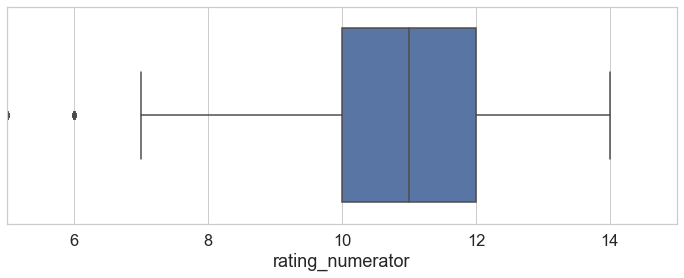

In [10]:
plt.figure(figsize=(12,4))

sns.boxplot(x=df_merged['rating_numerator'])

plt.axis(xmin=5,xmax=15)

plt.show()

Now we compare the different dog stages. We first create a pie chart to show how our data is distributed along different dog stages.

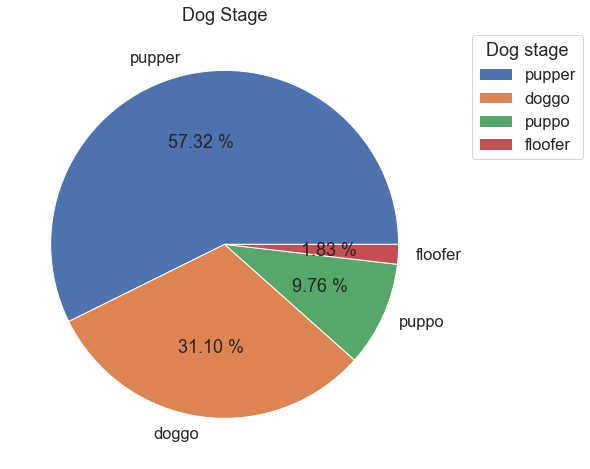

In [11]:
data = df_merged['dog_stage'].value_counts()

labels = data.keys()

plt.figure(figsize=(8,8))

plt.pie(data,labels=labels, autopct='%.2f %%')

plt.legend(title='Dog stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Dog Stage')
plt.show()

We compare the dog stages popularity by comparing the average retweets and favorites of each stage. 

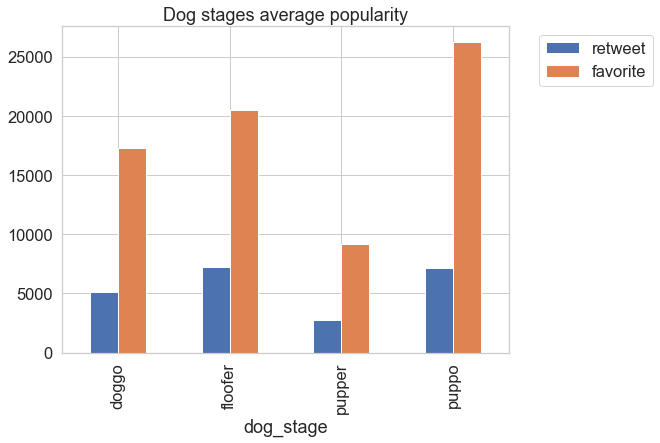

In [12]:
data = df_merged.groupby('dog_stage').mean()[['retweet_count','favorite_count']]


data.plot(kind='bar',figsize=(8,6))

plt.title('Dog stages average popularity')

plt.legend(labels=['retweet','favorite'],title='', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

we compare the dog stages ratings by plotting the average rating given by WeRateDogs for each stage.

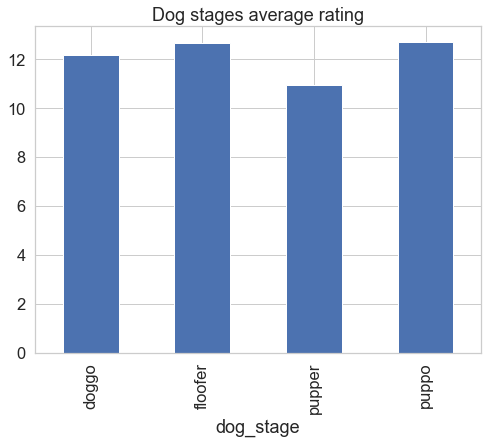

In [13]:
data = df_merged.groupby('dog_stage').mean()[['rating_numerator']]

data.plot(kind='bar',figsize=(8,6),legend=False)

plt.title('Dog stages average rating')

plt.show()

Comparing Favorite dogs with the account ratings to find the most rating the followers agree with

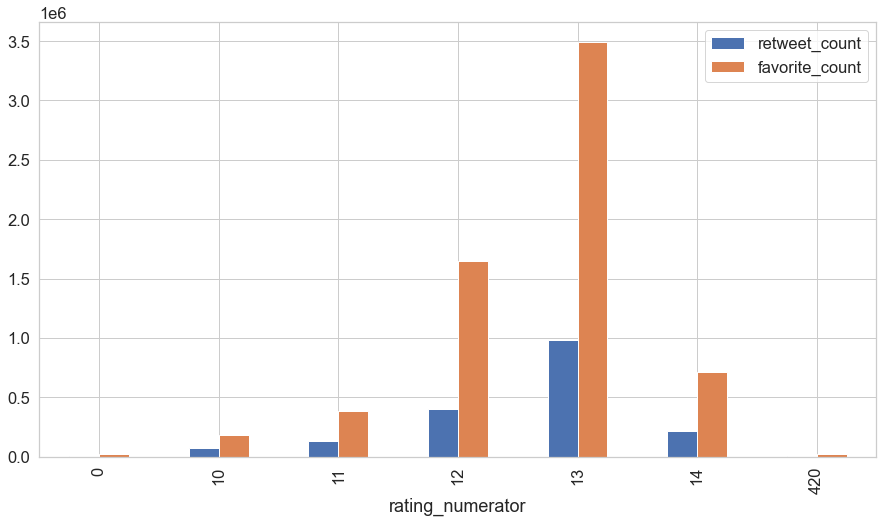

In [14]:
top_dogs = df_merged[df_merged['favorite_count'] > 20000]

data = top_dogs.groupby('rating_numerator').sum()[['retweet_count','favorite_count']]

data.plot(kind='bar',figsize=(15,8))

plt.show()

We analyze the account performance over time by plotting the retweet counts and the favorites counts  among months. As there was a big gap between the second half of 2015 and the first half of 2016, only a continuous portion of the data was taken into consideration for better visualization.

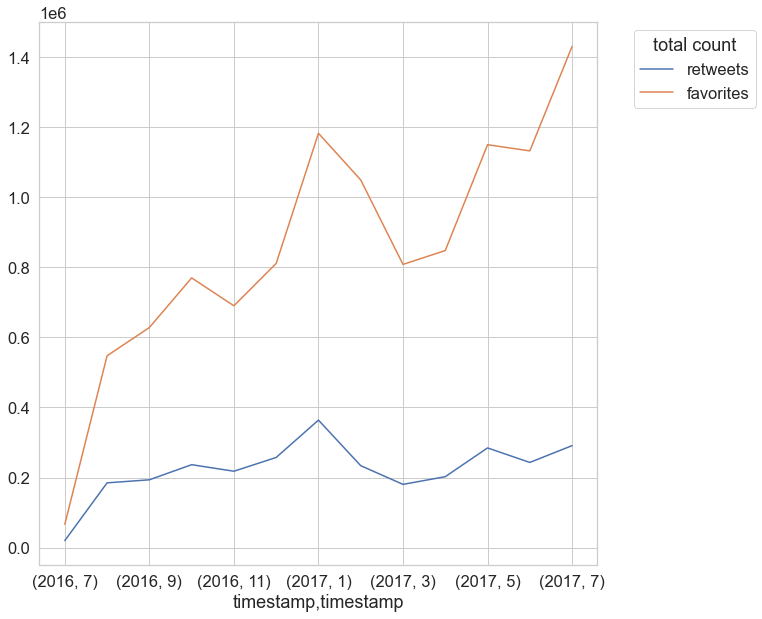

In [15]:
df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'])

data = df_merged.groupby([(df_merged['timestamp'].dt.year),(df_merged['timestamp'].dt.month)]).sum()

data[['retweet_count','favorite_count']][2:-1].plot(kind='line',figsize=(10,10))

plt.legend(labels=['retweets','favorites'],title='total count', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

We find the top rated breed of dogs by calculating the mean rating given by WeRateDogs for each breed.

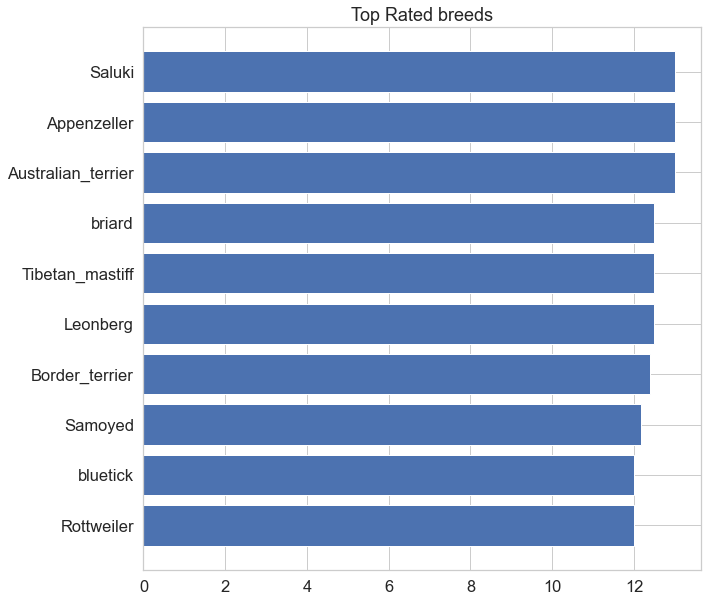

In [16]:
# top rated breeds of dogs
only_dogs = df_merged[df_merged['breed']==True]
rating = only_dogs.groupby('prediction').mean().sort_values(by='rating_numerator',ascending=False)

data = rating['rating_numerator'][:10]
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(data.keys(),data.values)
ax.invert_yaxis()
plt.title('Top Rated breeds')
plt.show()


We find the most retweeted breed of dogs by calculating the mean retweet count for each breed.

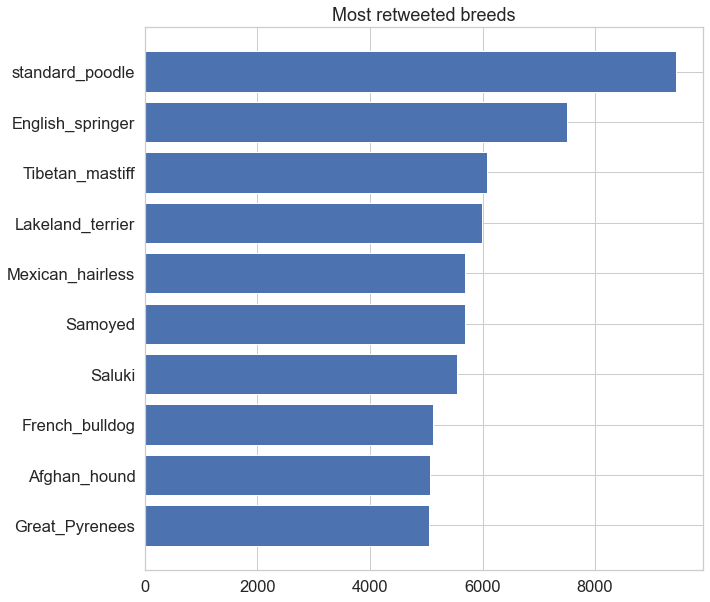

In [17]:
# top retweeted breeds of dogs
only_dogs = df_merged[df_merged['breed']==True]
rating = only_dogs.groupby('prediction').mean().sort_values(by='retweet_count',ascending=False)

data = rating['retweet_count'][:10]
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(data.keys(),data.values)
ax.invert_yaxis()
plt.title('Most retweeted breeds')
plt.show()

We find the Most favorited breed of dogs by calculating the mean favorite count for each breed.

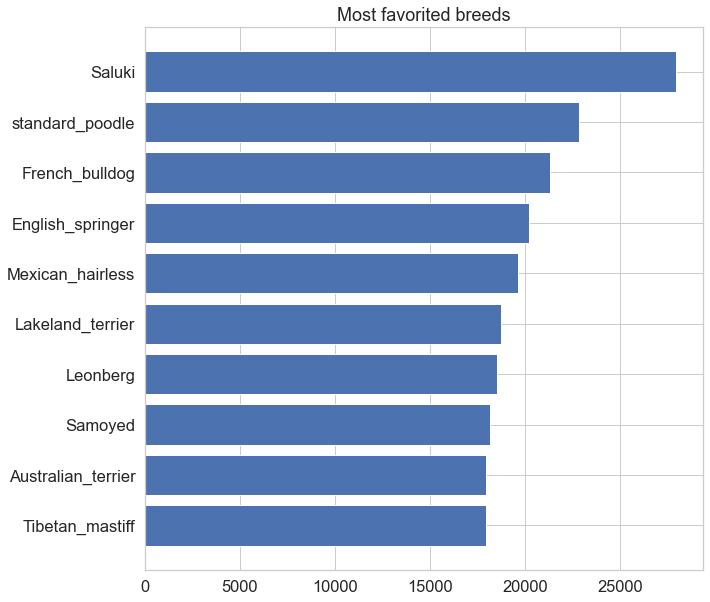

In [18]:
# top favorite breeds of dogs
only_dogs = df_merged[df_merged['breed']==True]
rating = only_dogs.groupby('prediction').mean().sort_values(by='favorite_count',ascending=False)

data = rating['favorite_count'][:10]
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(data.keys(),data.values)
ax.invert_yaxis()
plt.title('Most favorited breeds')
plt.show()

## 2.3 Conclusion

From the above visualizations and analysis, we can now try to answer the questions we posed earlier:
    
    1. What's the most common rating that WeRateDogs gives?
        The most common rating given by WeRateDogs is 12
    2. How does the WeRateDogs rating correlate with the interaction of the account(rating vs. retweets and fovorites)?
        rating of 13 which is higher than the usual rating the account gives (12) gets the most retweets and favorites.
    3. How the social insteraction with the account progressed over time (retweets' and favorites' counts)?
        The interaction has progreesed over time. The retweet rate look somewhat stable. However the favorite vount had a very high slope.
    4. Which dog breeds are the most likable (most retweeted and most favorite)?
        - most retweeted: standard poodle
        - most favorite: Saluki
    5. How are the dog stages ratings compared?
        There's no big difference between the average ratings of different dog stages
    6. What's the interaction level for each dog stage?
        puppo seems to by the most favorited stage. then comes doggo and floofer. however, pupper seems to be the least popular.